In [1]:
import tensorflow
import gym
import gym_anytrading
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/Users/sampson/miniforge3/envs/tensorflow24/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
key_id = 'PK04UHV69AF2QULV4REU'
secret_key = '7g1qUN7qjsfW3U6oSccYYtHyQdoewJ12ANDQmSKd'
endpoint = 'https://paper-api.alpaca.markets'

In [3]:
# connect to alpaca api
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime


stock_client = StockHistoricalDataClient(key_id, secret_key)

# get 1 years worth data on Nvidia by the day. Could also use TimeFrame.Minute for daily data
request_params = StockBarsRequest(symbol_or_symbols=['NVDA'],
                                  timeframe=TimeFrame.Day,
                                  start=datetime(2020, 1, 1),
                                  end=datetime(2022, 1, 1)
                                  )

bars = stock_client.get_stock_bars(request_params)


In [4]:
data=bars.df.reset_index()
data.head()
df=data.iloc[:,1:]
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2020-01-02 05:00:00+00:00,238.85,239.91,236.720,239.91,5941969.0,67912.0,238.723319
1,2020-01-03 05:00:00+00:00,235.00,237.83,234.100,236.07,5145208.0,63605.0,236.384392
2,2020-01-06 05:00:00+00:00,232.36,237.27,231.270,237.06,6572812.0,73912.0,235.468778
3,2020-01-07 05:00:00+00:00,238.20,241.77,236.390,239.93,7980144.0,81624.0,239.855220
4,2020-01-08 05:00:00+00:00,239.76,242.04,238.149,240.38,6931017.0,70240.0,240.313148


In [5]:
df.dtypes

timestamp      datetime64[ns, UTC]
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
trade_count                float64
vwap                       float64
dtype: object

In [6]:
from numpy import column_stack


df.rename(columns={"timestamp":"Date","close":'Close'},inplace=True)
df=df.iloc[:,:-2]
df.head(5)

,Date,open,high,low,Close,volume
0,2020-01-02 05:00:00+00:00,238.85,239.91,236.720,239.91,5941969.0
1,2020-01-03 05:00:00+00:00,235.00,237.83,234.100,236.07,5145208.0
2,2020-01-06 05:00:00+00:00,232.36,237.27,231.270,237.06,6572812.0
3,2020-01-07 05:00:00+00:00,238.20,241.77,236.390,239.93,7980144.0
4,2020-01-08 05:00:00+00:00,239.76,242.04,238.149,240.38,6931017.0


In [11]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
#env = gym.make('stocks-v0',frame_bound=(10,100),window_size=5)

In [8]:
#env.signal_features

array([[ 2.39910e+02,  0.00000e+00],
       [ 2.36070e+02, -3.84000e+00],
       [ 2.37060e+02,  9.90000e-01],
       [ 2.39930e+02,  2.87000e+00],
       [ 2.40380e+02,  4.50000e-01],
       [ 2.43020e+02,  2.64000e+00],
       [ 2.44320e+02,  1.30000e+00],
       [ 2.51980e+02,  7.66000e+00],
       [ 2.47280e+02, -4.70000e+00],
       [ 2.45570e+02, -1.71000e+00],
       [ 2.48930e+02,  3.36000e+00],
       [ 2.49280e+02,  3.50000e-01],
       [ 2.47940e+02, -1.34000e+00],
       [ 2.50050e+02,  2.11000e+00],
       [ 2.52860e+02,  2.81000e+00],
       [ 2.50480e+02, -2.38000e+00],
       [ 2.40200e+02, -1.02800e+01],
       [ 2.47970e+02,  7.77000e+00],
       [ 2.45540e+02, -2.43000e+00],
       [ 2.45810e+02,  2.70000e-01],
       [ 2.36430e+02, -9.38000e+00],
       [ 2.40330e+02,  3.90000e+00],
       [ 2.47130e+02,  6.80000e+00],
       [ 2.50760e+02,  3.63000e+00],
       [ 2.54245e+02,  3.48500e+00],
       [ 2.51590e+02, -2.65500e+00],
       [ 2.62970e+02,  1.13800e+01],
 

In [9]:
#env.prices

array([239.91 , 236.07 , 237.06 , 239.93 , 240.38 , 243.02 , 244.32 ,
       251.98 , 247.28 , 245.57 , 248.93 , 249.28 , 247.94 , 250.05 ,
       252.86 , 250.48 , 240.2  , 247.97 , 245.54 , 245.81 , 236.43 ,
       240.33 , 247.13 , 250.76 , 254.245, 251.59 , 262.97 , 267.89 ,
       272.54 , 270.78 , 289.79 , 296.57 , 314.7  , 308.7  , 294.07 ,
       273.28 , 262.05 , 267.65 , 252.6  , 270.07 , 276.43 , 265.89 ,
       284.51 , 273.29 , 266.04 , 245.44 , 261.08 , 246.47 , 216.31 ,
       240.84 , 196.4  , 217.27 , 202.82 , 212.97 , 205.75 , 212.69 ,
       249.18 , 245.62 , 257.24 , 252.73 , 265.59 , 263.6  , 243.07 ,
       255.47 , 243.91 , 268.4  , 259.03 , 266.95 , 262.95 , 269.85 ,
       283.95 , 280.84 , 294.7  , 292.32 , 287.05 , 269.51 , 286.15 ,
       284.01 , 289.59 , 297.08 , 291.36 , 298.46 , 292.28 , 282.78 ,
       291.285, 293.74 , 297.79 , 304.87 , 312.5  , 322.62 , 312.1  ,
       311.2  , 321.22 , 339.63 , 350.01 , 352.22 , 358.8  , 351.01 ,
       361.05 , 348.

info: {'total_reward': -38.87000000000012, 'total_profit': 0.3228537402612443, 'position': 0}


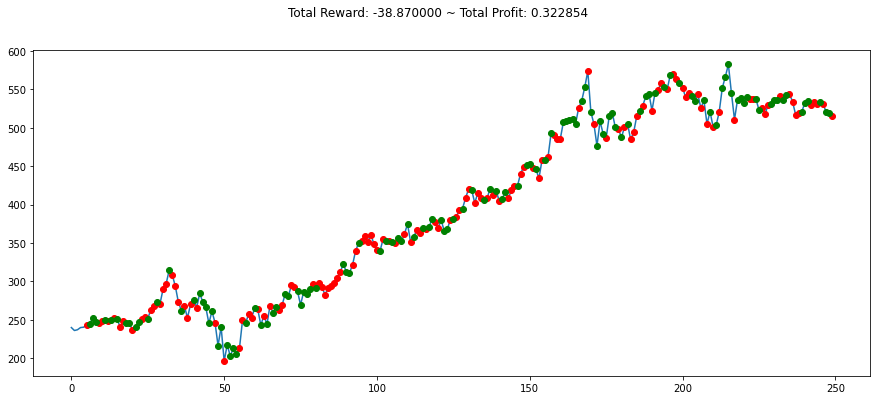

In [12]:
#Build Environment
state = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
##Add Custom Indicators

In [19]:
!pip3 install finta


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [20]:
from gym_anytrading.envs import StocksEnv
from finta import TA


In [29]:
df['volume']=df['volume'].astype(str)

In [31]:
df['volume']=df['volume'].apply(lambda x: float(x.replace(',','')))

In [33]:
#calculate the SMA RSI and OBV

In [36]:
df['SMA']=TA.SMA(df,12)
df["RSI"]=TA.RSI(df)
df['OBV']=TA.OBV(df)
df.fillna(0,inplace=True)
df.head(20)

,Date,open,high,low,Close,volume,SMA,RSI,OBV
0,2020-01-02 05:00:00+00:00,238.85,239.9100,236.7200,239.91,5941969.0,0.000000,0.000000,0.0
1,2020-01-03 05:00:00+00:00,235.00,237.8300,234.1000,236.07,5145208.0,0.000000,0.000000,-5145208.0
2,2020-01-06 05:00:00+00:00,232.36,237.2700,231.2700,237.06,6572812.0,0.000000,21.730950,1427604.0
3,2020-01-07 05:00:00+00:00,238.20,241.7700,236.3900,239.93,7980144.0,0.000000,53.367920,9407748.0
4,2020-01-08 05:00:00+00:00,239.76,242.0400,238.1490,240.38,6931017.0,0.000000,56.347335,16338765.0
5,2020-01-09 05:00:00+00:00,243.55,245.9297,240.8550,243.02,6386053.0,0.000000,68.900960,22724818.0
6,2020-01-10 05:00:00+00:00,247.48,248.5500,243.7500,244.32,7911560.0,0.000000,73.016122,30636378.0
7,2020-01-13 05:00:00+00:00,247.66,252.9884,246.7500,251.98,8008451.0,0.000000,85.332239,38644829.0
8,2020-01-14 05:00:00+00:00,250.51,251.2800,246.7500,247.28,8989483.0,0.000000,65.559779,29655346.0
9,2020-01-15 05:00:00+00:00,247.79,248.6891,244.5300,245.57,6577646.0,0.000000,60.103112,23077700.0


In [47]:
#create a new environment

def add_signals(env):
    start = env.frame_bound[0]-env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['low','volume','SMA','RSI','OBV']].to_numpy()[start:end]
    return prices,signal_features

In [48]:

class MycustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MycustomEnv(df=df,window_size=12,frame_bound=(12,50))


In [50]:
#Build environment and Train

#env_maker = lambda: gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
env_maker = lambda: env2
env = DummyVecEnv([env_maker])


In [51]:
model = A2C('MlpPolicy',env,verbose=1)

model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 2059     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.495   |
|    explained_variance | 0.365    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.618    |
|    value_loss         | 1.25     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2214     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0.117    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -17.8    |
|    value_loss      

In [58]:
#Evaluation

env = MycustomEnv(df=df,window_size=12,frame_bound=(80,120))
#env = gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 39.79860000000002, 'total_profit': 0.9810571569068982, 'position': 0}


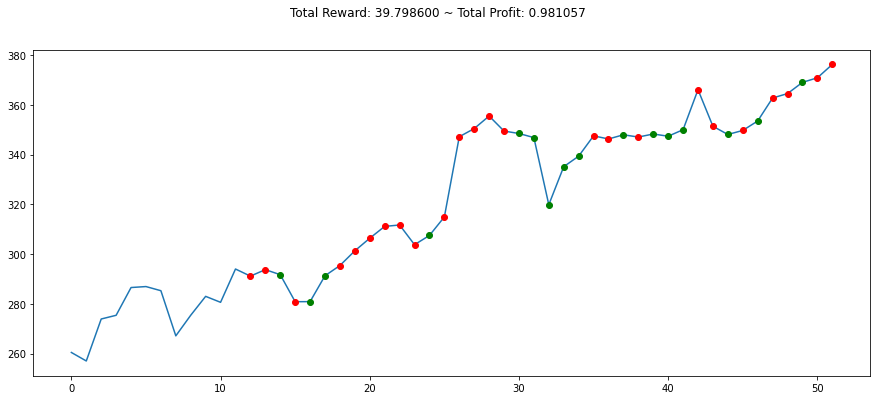

In [59]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()